# Covid-19 Weekly Trends in Oceania - Full Project

#### Importing Liabaries 

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import joblib
import os
import kagglehub

#### # Optional styling

In [76]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [44]:
!pip install kagglehub

#### # Download dataset

In [16]:
path = kagglehub.dataset_download("anandhuh/covid-weekly-trends-in-oceania")
print("Dataset downloaded to:", path)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 355kB/s]

Extracting files...
Dataset downloaded to: /Users/macbookpro/.cache/kagglehub/datasets/anandhuh/covid-weekly-trends-in-oceania/versions/16


#### Paste Dataset in the Path

In [24]:

# Paste dataset path
dataset_path = "/Users/macbookpro/.cache/kagglehub/datasets/anandhuh/covid-weekly-trends-in-oceania/versions/16"

# See what files are inside that folder
print("Files in folder:")
print(os.listdir(dataset_path))



Files in folder:
['covid_oceania_weekly_trend.csv']


#### Read the CSV File

In [77]:
csv_file = os.path.join(dataset_path, "covid_oceania_weekly_trend.csv")
df = pd.read_csv(csv_file)

### Inspect the Data

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country/Other                     14 non-null     object
 1   Cases in the last 7 days          14 non-null     int64 
 2   Cases in the preceding 7 days     14 non-null     int64 
 3   Weekly Case % Change              14 non-null     int64 
 4   Cases in the last 7 days/1M pop   14 non-null     int64 
 5   Deaths in the last 7 days         14 non-null     int64 
 6   Deaths in the preceding 7 days    14 non-null     int64 
 7   Weekly Death % Change             14 non-null     int64 
 8   Deaths in the last 7 days/1M pop  14 non-null     int64 
 9   Population                        14 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.2+ KB


#### Preview the Data

In [79]:
print(df.head())

      Country/Other  Cases in the last 7 days  Cases in the preceding 7 days  \
0         Australia                     46937                          74787   
1      Cook Islands                       118                            408   
2              Fiji                        22                             21   
3  French Polynesia                         0                             47   
4        Micronesia                        13                             31   

   Weekly Case % Change  Cases in the last 7 days/1M pop  \
0                   -37                             1801   
1                   -71                             6716   
2                     5                               24   
3                  -100                                0   
4                   -58                              111   

   Deaths in the last 7 days  Deaths in the preceding 7 days  \
0                        388                             253   
1                          0  

In [80]:
df.columns

Index(['Country/Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')

In [81]:
df.describe()

,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,4274.500000,7019.357143,-43.000000,4900.000000,29.857143,22.500000,-20.785714,1.500000,2.383339e+06
std,12711.378511,20380.748199,47.821785,14672.531956,103.390118,67.857033,46.983104,4.201648,6.935012e+06
min,0.000000,3.000000,-100.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,1.622000e+03
25%,7.000000,21.750000,-69.750000,39.000000,0.000000,0.000000,-33.000000,0.000000,4.061200e+04
50%,19.500000,39.000000,-51.000000,192.500000,0.000000,0.000000,0.000000,0.000000,1.598640e+05
75%,114.250000,268.250000,-13.750000,1589.750000,0.000000,2.750000,0.000000,0.000000,3.141028e+05
max,46937.000000,74787.000000,67.000000,55487.000000,388.000000,253.000000,53.000000,15.000000,2.606879e+07


In [82]:
df.tail()

,Country/Other,Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
9,Palau,5,3,67,274,0,0,0,0,18233
10,Samoa,17,16,6,84,0,0,0,0,202239
11,Tonga,103,305,-66,956,0,0,0,0,107749
12,Vanuatu,0,24,-100,0,0,0,0,0,321832
13,Wallis and Futuna,0,12,-100,0,0,0,0,0,10982


In [83]:
df.isnull().sum()

Country/Other                       0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceding 7 days      0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

#### Clean the data
##### Remove commas and convert to float for relevant columns

In [84]:
cols_to_clean = [
    'Cases in the last 7 days', 'Cases in the preceding 7 days',
    'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
    'Deaths in the preceding 7 days', 'Deaths in the last 7 days/1M pop',
    'Population'
]
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)


#### Remove % and convert to float for % columns

In [85]:
df['Weekly Case % Change'] = df['Weekly Case % Change'].astype(str).str.replace('%', '').astype(float)
df['Weekly Death % Change'] = df['Weekly Death % Change'].astype(str).str.replace('%', '').astype(float)


#### One-Hot Encode 'Country/Other'

In [86]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_country = encoder.fit_transform(df[['Country/Other']])
encoded_df = pd.DataFrame(encoded_country, columns=encoder.get_feature_names_out(['Country/Other']))

#### Define features (X) and target (y)

In [87]:
X = pd.concat([encoded_df, df[[
    'Cases in the last 7 days',
    'Cases in the preceding 7 days',
    'Weekly Case % Change',
    'Cases in the last 7 days/1M pop',
    'Deaths in the preceding 7 days',
    'Weekly Death % Change',
    'Deaths in the last 7 days/1M pop',
    'Population']]], axis=1)

y = df['Deaths in the last 7 days']

#### Split into train and test sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train Linear Regression model

In [89]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#### Train Random Forest model

In [90]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


#### Evaluate both models

In [91]:
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)


#### Compare the performance 

In [92]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [lr_r2, rf_r2],
    'Mean Absolute Error': [lr_mae, rf_mae]
})
print(comparison_df)


               Model  R² Score  Mean Absolute Error
0  Linear Regression  0.303075            88.283995
1      Random Forest -0.372915           123.733333


#### Visualize predictions

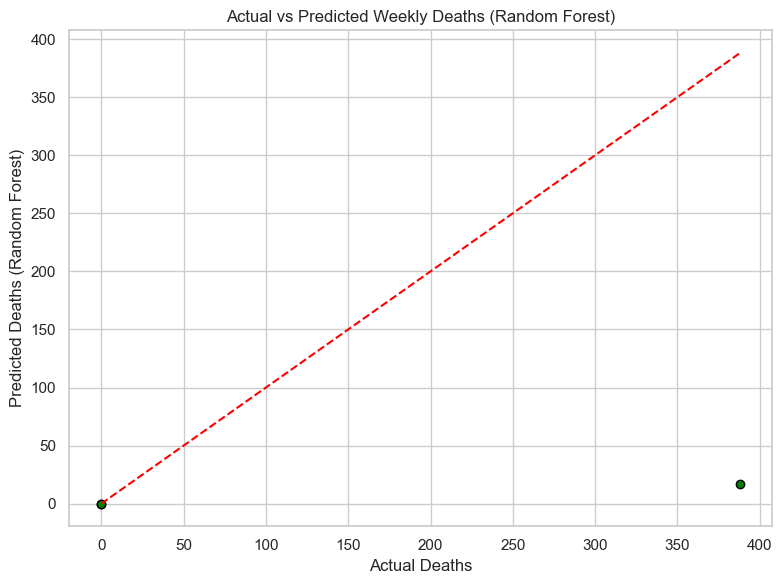

In [93]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths (Random Forest)")
plt.title("Actual vs Predicted Weekly Deaths (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Feature Importance

In [94]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance)

                             Feature  Importance
13     Cases in the preceding 7 days    0.238806
12          Cases in the last 7 days    0.194030
19                        Population    0.164179
5          Country/Other_New Zealand    0.164179
16    Deaths in the preceding 7 days    0.134328
18  Deaths in the last 7 days/1M pop    0.089552
15   Cases in the last 7 days/1M pop    0.014925
0         Country/Other_Cook Islands    0.000000
3           Country/Other_Micronesia    0.000000
2     Country/Other_French Polynesia    0.000000
1                 Country/Other_Fiji    0.000000
4        Country/Other_New Caledonia    0.000000
11   Country/Other_Wallis and Futuna    0.000000
10             Country/Other_Vanuatu    0.000000
9                Country/Other_Tonga    0.000000
8                Country/Other_Samoa    0.000000
7                Country/Other_Palau    0.000000
6                 Country/Other_Niue    0.000000
14              Weekly Case % Change    0.000000
17             Weekl

#### Save model

In [95]:

joblib.dump(rf_model, "random_forest_covid_model.joblib")


['random_forest_covid_model.joblib']

# Install Required Libraries

In [96]:
pip install xgboost catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


#### Import libraries 


In [98]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#### Train and Predict with XGBoost

In [99]:
# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)


#### Train and Predict with CatBoost

In [100]:
# Train CatBoost (silent=True to hide long output)
cat_model = CatBoostRegressor(iterations=100, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

# Predict using CatBoost
y_pred_cat = cat_model.predict(X_test)


#### Evaluate All Models

In [101]:
# Calculate scores
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

cat_r2 = r2_score(y_test, y_pred_cat)
cat_mae = mean_absolute_error(y_test, y_pred_cat)

# Create updated comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CatBoost'],
    'R² Score': [lr_r2, rf_r2, xgb_r2, cat_r2],
    'Mean Absolute Error': [lr_mae, rf_mae, xgb_mae, cat_mae]
})

print(comparison_df)


               Model  R² Score  Mean Absolute Error
0  Linear Regression  0.303075            88.283995
1      Random Forest -0.372915           123.733333
2            XGBoost -0.499999           129.333374
3           CatBoost -0.335194           122.150591


#### Feature importance plot

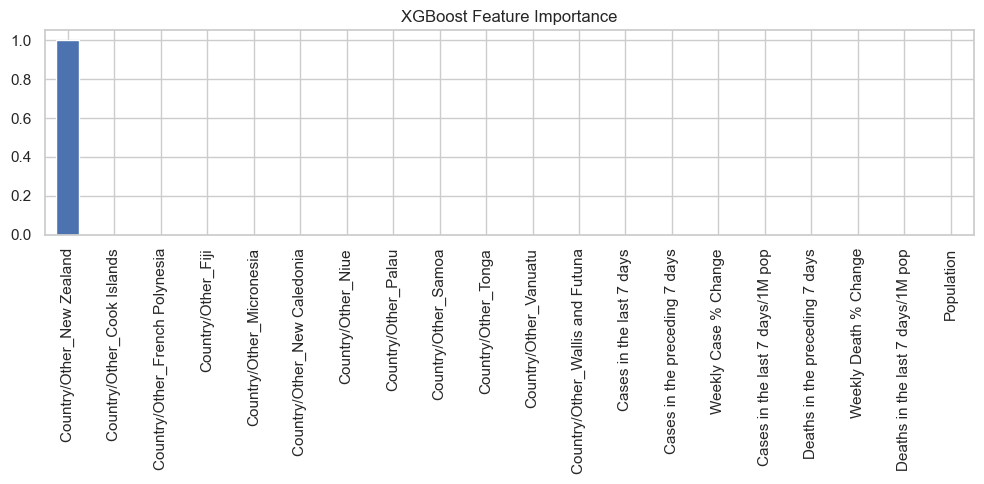

In [102]:
# For XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='XGBoost Feature Importance')
plt.tight_layout()
plt.show()


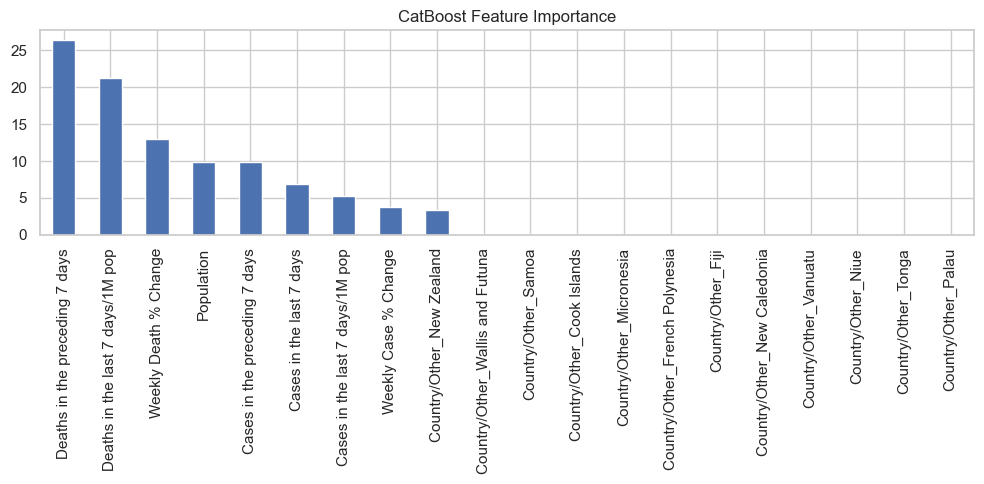

In [103]:
# For CatBoost
cat_importance = pd.Series(cat_model.feature_importances_, index=X.columns)
cat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='CatBoost Feature Importance')
plt.tight_layout()
plt.show()